In [1]:
%matplotlib inline

In [2]:
import glob, os

In [3]:
import numpy as np

In [4]:
from collections import defaultdict

In [5]:
from matplotlib import pyplot as plt

In [6]:
plt.style.available

[u'seaborn-darkgrid',
 u'Solarize_Light2',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'fast',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

In [7]:
import cPickle

In [8]:
plt.style.use('seaborn')

# Plots for the paper

In [16]:
dirs_dict = {}
dirs_dict['ws'] = glob.glob('experiments/important/0430_vlmap2vqa_diverse_seed/*_wordset_only_*')
dirs_dict['ws'].append('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_wordset_only_sp_bs512_lr0.001_20180424-124312')
dirs_dict['bf'] = glob.glob('experiments/important/0430_vlmap2vqa_diverse_seed/*_bf_only_*')
dirs_dict['bf'].append('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_only_sp_bs512_lr0.001_20180423-231715')
dirs_dict['bf_ws'] = glob.glob('experiments/important/0430_vlmap2vqa_diverse_seed/*my_bf_or_wordset_*')
dirs_dict['bf_ws'].append('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_sp_bs512_lr0.001_20180423-205117')
dirs_dict['noc_bf_ws'] = glob.glob('experiments/important/0430_vlmap2vqa_diverse_seed/*my_noc_bf_or_wordset_*')
dirs_dict['noc_bf_ws'].append('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_noc_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_noc_bf_or_wordset_4801_bs512_lr0.001_20180424-171148')
dirs_dict['word2vec'] = glob.glob('/home/carpedm20/git/vlmap/word2vec_train_dir/vqa_standard_word2vec_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_dpFalse_mdstandard_word2vec_sd*')
dirs_dict['word2vec'].append('experiments/important/0518_standard_word2vec_4th_seed_in_the_paper/vqa_standard_word2vec_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_default_bs512_lr0.001_seed456_20180514-130648')
#dirs_dict['word2vec2'] = glob.glob('/home/carpedm20/git/vlmap/word2vec_train_dir/vqa_standard_word2vec_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_dpFalse_mdstandard_word2vec_sd345*')
#dirs_dict['word2vec3'] = glob.glob('/home/carpedm20/git/vlmap/word2vec_train_dir/vqa_standard_word2vec_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_dpFalse_mdstandard_word2vec_sd456*')
dirs_dict['standard'] = ['experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_standard_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_default_bs512_lr0.001_20180424-100715']
dirs_dict['enwiki0'] = glob.glob('/home/carpedm20/git/vlmap/enwiki0_train_dir/vqa_*')
dirs_dict['total'] = glob.glob('/home/carpedm20/git/vlmap/new_enwiki_train_dir/vlmap_bf_or_wordset_enwiki_withatt_sp/*')
#dirs_dict['enwiki1'] = glob.glob('/home/carpedm20/git/vlmap/enwiki1_train_dir/vqa_*')

In [10]:
dirs_dict['enwiki0'] = dirs_dict['enwiki0'][:4]

In [11]:
dirs_dict['enwiki0']

['/home/carpedm20/git/vlmap/enwiki0_train_dir/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_dpFalse_mdvlmap_answer_sd456_vqasd234_bs512_lr0.001_seed234_20180514-204655',
 '/home/carpedm20/git/vlmap/enwiki0_train_dir/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_dpFalse_mdvlmap_answer_sd456_vqasd123_bs512_lr0.001_seed123_20180514-204655',
 '/home/carpedm20/git/vlmap/enwiki0_train_dir/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_dpFalse_mdvlmap_answer_sd234_vqasd345_bs512_lr0.001_seed345_20180514-151138',
 '/home/carpedm20/git/vlmap/enwiki0_train_dir/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_dpFalse_mdvlmap_answer_sd3

In [12]:
titles = ['Total [Object + Attribute]', 'Object Answers', 'Attribute Answers']
names = ['new_testonly_score', 'new_test_obj_only_score', 'new_test_attr_only_score']

In [17]:
data_dict = {}
data_summary_dict = {}
for key in dirs_dict:
    data_dict[key] = defaultdict(list)
    for a_dir in dirs_dict[key]:
        r = cPickle.load(open(os.path.join(a_dir, 'collect_eval_test_result.pkl'), 'rb'))
        for r_key in r:
            data_dict[key][r_key].append(r[r_key])

    new_data_dict = defaultdict(list)
    for l in range(len(data_dict[key]['iter'])):
        if len(data_dict[key]['iter'][l]) == 0:
            continue
        for k in data_dict[key]:
            new_data_dict[k].append(data_dict[key][k][l])
    data_dict[key] = new_data_dict
    min_len = min([len(l) for l in data_dict[key]['iter']])
    data_summary_dict[key] = {}
    data_summary_dict[key]['iter'] = data_dict[key]['iter'][0][:min_len]
    
    for name in names:
        data_summary_dict[key][name] = []
        for w in data_dict[key][name]:
            data_summary_dict[key][name].append(w[:min_len])
    
        data_summary_dict[key][name] = np.array(data_summary_dict[key][name])
        data_summary_dict[key][name + '_mean'] = data_summary_dict[key][name].mean(axis=0)
        data_summary_dict[key][name + '_std'] = data_summary_dict[key][name].std(axis=0)

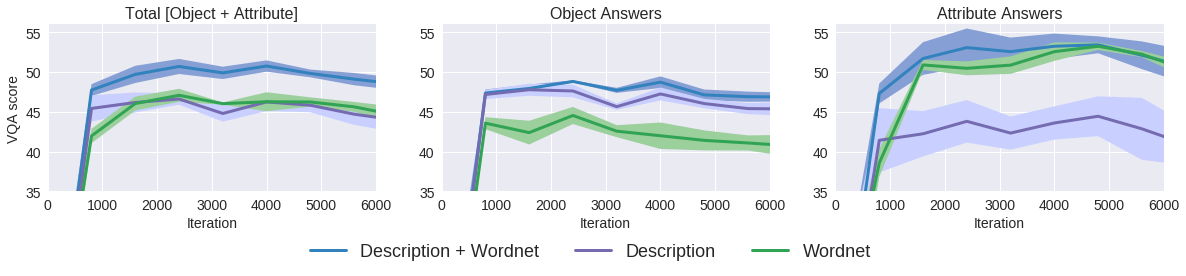

In [18]:
plt.figure(figsize=(20,4))
#plt.suptitle('Liguistic Knowledge Sources Comparison', fontsize=20, x=0.51, y=1.08)
y_lims = [(35, 56), (35, 56), (35, 56)]
linecolors = {
    'bf_ws': '#3182bd',
    'bf': '#756bb1',
    'ws': '#31a354',
    'enwiki0': '#aaaa0a',
}
facecolors = {
    'bf_ws': '#869fd5ff',
    'bf': '#c9d0ffff',
    'ws': '#9bcf9bff',
    'enwiki0': '#aaaa0a40',
}
for i, (title, name, y_lim) in enumerate(zip(titles, names, y_lims)):
    plt.subplot(1, 3, i+1)
    for res_key in ['bf_ws', 'bf', 'ws']:
        res = data_summary_dict[res_key]
        x = res['iter']
        y = res[name + '_mean'] * 100
        y_err = res[name + '_std'] * 100
        plt.plot(x, y, linewidth=3, color=linecolors[res_key])
        plt.fill_between(x, y - y_err, y + y_err, facecolor=facecolors[res_key])

    plt.title(title, fontsize=16)
    #plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
    plt.ylim(y_lim)
    plt.xlim((0, 6000))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i == 0:
        plt.ylabel('VQA score', fontsize=14)
    plt.xlabel('Iteration', fontsize=14)

plt.figlegend(['Description + Wordnet', 'Description', 'Wordnet'], loc='lower center', ncol=5, fontsize=18, bbox_to_anchor=(0.41, 0))
plt.subplots_adjust(bottom=0.3)
#plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )

#plt.tight_layout()
plt.savefig('plots/data_comparison_with_std.png',bbox_inches='tight')
plt.show()

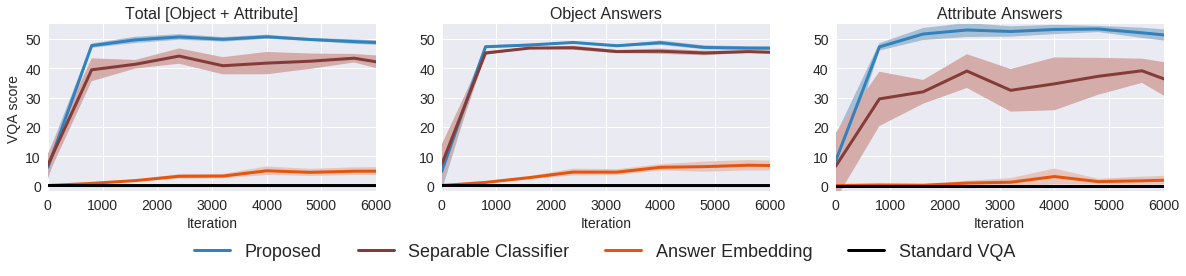

In [19]:
plt.figure(figsize=(20,4))
#plt.suptitle('Liguistic Knowledge Sources Comparison', fontsize=20, x=0.51, y=1.08)
y_lims = [(-2, 55), (-2, 55), (-2, 55)]
linecolors = {
    'bf_ws': '#3182bd',
    'noc_bf_ws': '#843c39',
    'word2vec': '#e6550d',
    'standard': 'black'
}
facecolors = {
    'bf_ws': '#a6bfd5',
    'noc_bf_ws': '#d4aca9',
    'word2vec': '#e6c5bd',
    'standard': 'black',
}
for i, (title, name, y_lim) in enumerate(zip(titles, names, y_lims)):
    plt.subplot(1, 3, i+1)
    for res_key in ['bf_ws', 'noc_bf_ws', 'word2vec', 'standard']:
        res = data_summary_dict[res_key]
        x = res['iter']
        y = res[name + '_mean'] * 100
        y_err = res[name + '_std'] * 100
        plt.plot(x, y, linewidth=3, color=linecolors[res_key])
        plt.fill_between(x, y - y_err, y + y_err, facecolor=facecolors[res_key])

    plt.title(title, fontsize=16)
    #plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
    plt.ylim(y_lim)
    plt.xlim((0, 6000))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i == 0:
        plt.ylabel('VQA score', fontsize=14)
    plt.xlabel('Iteration', fontsize=14)

plt.figlegend(['Proposed', 'Separable Classifier', 'Answer Embedding', 'Standard VQA'], loc='lower center', ncol=4, fontsize=18, bbox_to_anchor=(0.42, 0))
plt.subplots_adjust(bottom=0.3)
#plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )

#plt.tight_layout()
plt.savefig('plots/model_comparison_with_std.png',bbox_inches='tight')
plt.show()

# Plots for supplementary material (including non zero-shot answers)

In [135]:
dirs_dict = {}
dirs_dict['standard'] = glob.glob('/home/carpedm20/git/vlmap/vqa_all_standard_and_non_standard_train_dir/vqa_standard_d_qa_*_vqasd234*')
dirs_dict['standard'].extend(glob.glob('train_dir/vqa_standard_*_seed*'))
dirs_dict['word2vec'] = glob.glob('/home/carpedm20/git/vlmap/vqa_all_standard_and_non_standard_train_dir/vqa_standard_word2vec_d_qa*')
#dirs_dict['bf_ws'] = glob.glob('train_dir/vqa_vlmap_answer_vqa_all*')
dirs_dict['bf_ws'] = glob.glob('/home/carpedm20/git/vlmap/vlmap_answer_vqa_all2_train_dir/vqa_vlmap_answer_vqa_all2_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_with_seen_answer_in_test_tf_record_memft_vfeat_bottomup_36_my_mdvlmap_answer_vqa_all2_vqasd123_bs512_lr0.001_seed123_20180518-233202')
dirs_dict['bf_ws'].append('/home/carpedm20/git/vlmap/train_dir/vqa_vlmap_answer_vqa_all2_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_with_seen_answer_in_test_tf_record_memft_vfeat_bottomup_36_my_mdvlmap_answer_vqa_all2_vqasd345_bs512_lr0.001_seed345_20180519-030515')
dirs_dict['bf_ws'].append('/home/carpedm20/git/vlmap/train_dir/vqa_vlmap_answer_vqa_all2_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_with_seen_answer_in_test_tf_record_memft_vfeat_bottomup_36_my_mdvlmap_answer_vqa_all2_vqasd234_bs512_lr0.001_seed234_20180519-032830')

In [133]:
titles = ['Total [Train + Zero-shot] Answers', 'Train Answers', 'Zero-shot Answers']
names = ['new_total_total_score', 'new_no_test_total_score', 'new_no_train_total_score']

In [136]:
data_dict = {}
data_summary_dict = {}
for key in dirs_dict:
    data_dict[key] = defaultdict(list)
    for a_dir in dirs_dict[key]:
        r = cPickle.load(open(os.path.join(a_dir, 'collect_eval_test_result.pkl'), 'rb'))
        for r_key in r:
            data_dict[key][r_key].append(r[r_key])

    new_data_dict = defaultdict(list)
    for l in range(len(data_dict[key]['iter'])):
        if len(data_dict[key]['iter'][l]) == 0:
            continue
        for k in data_dict[key]:
            new_data_dict[k].append(data_dict[key][k][l])
    data_dict[key] = new_data_dict
    min_len = min([len(l) for l in data_dict[key]['iter']])
    data_summary_dict[key] = {}
    data_summary_dict[key]['iter'] = data_dict[key]['iter'][0][:min_len]
    
    for name in names:
        data_summary_dict[key][name] = []
        for w in data_dict[key][name]:
            data_summary_dict[key][name].append(w[:min_len])
    
        data_summary_dict[key][name] = np.array(data_summary_dict[key][name])
        data_summary_dict[key][name + '_mean'] = data_summary_dict[key][name].mean(axis=0)
        data_summary_dict[key][name + '_std'] = data_summary_dict[key][name].std(axis=0)

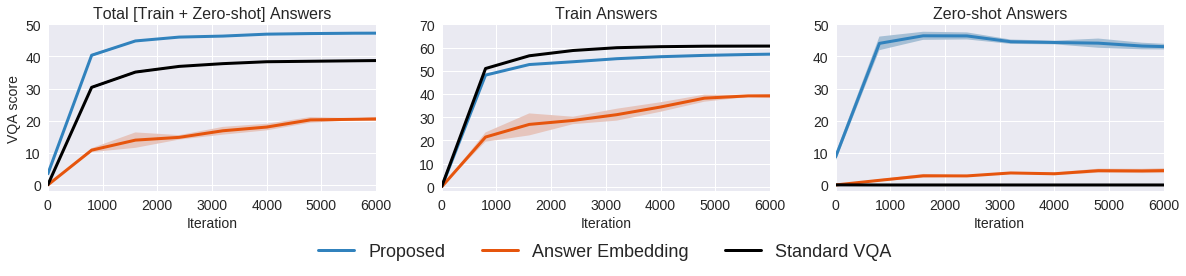

In [137]:
plt.figure(figsize=(20,4))
#plt.suptitle('Liguistic Knowledge Sources Comparison', fontsize=20, x=0.51, y=1.08)
y_lims = [(-2, 50), (-2, 70), (-2, 50)]
linecolors = {
    'bf_ws': '#3182bd',
    'noc_bf_ws': '#843c39',
    'word2vec': '#e6550d',
    'standard': 'black'
}
facecolors = {
    'bf_ws': '#a6bfd5',
    'noc_bf_ws': '#d4aca9',
    'word2vec': '#e6c5bd',
    'standard': 'black',
}
for i, (title, name, y_lim) in enumerate(zip(titles, names, y_lims)):
    plt.subplot(1, 3, i+1)
    for res_key in ['bf_ws', 'word2vec', 'standard']:
        res = data_summary_dict[res_key]
        x = res['iter']
        y = res[name + '_mean'] * 100
        y_err = res[name + '_std'] * 100
        plt.plot(x, y, linewidth=3, color=linecolors[res_key])
        plt.fill_between(x, y - y_err, y + y_err, facecolor=facecolors[res_key])

    plt.title(title, fontsize=16)
    #plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
    plt.ylim(y_lim)
    plt.xlim((0, 6000))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i == 0:
        plt.ylabel('VQA score', fontsize=14)
    plt.xlabel('Iteration', fontsize=14)

#plt.figlegend(['Proposed', 'Separable Classifier', 'Answer Embedding', 'Standard VQA'], loc='lower center', ncol=4, fontsize=18, bbox_to_anchor=(0.42, 0))
plt.figlegend(['Proposed', 'Answer Embedding', 'Standard VQA'], loc='lower center', ncol=4, fontsize=18, bbox_to_anchor=(0.42, 0))
plt.subplots_adjust(bottom=0.3)
#plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )

#plt.tight_layout()
plt.savefig('plots/model_comparison_with_std_vqa_all.png',bbox_inches='tight')
plt.show()

In [77]:
data_summary_dict['standard']['new_no_test_total_score_mean']

array([0.00066527, 0.51150196, 0.56228106, 0.58924024, 0.60078897,
       0.60477542, 0.60864752, 0.60820574, 0.60818495, 0.60958306])

In [464]:
data_dict.keys()

['bf', 'word2vec', 'bf_ws', 'noc_bf_ws', 'standard', 'enwiki0', 'ws', 'total']

In [473]:
data_dict['ws'].keys()

['test_obj_only_score',
 'new_test_attr_only_score',
 'test_attr_only_score',
 'testonly_score_num_point',
 'test_attr_only_score_num_point',
 'iter',
 'test_obj_only_score_num_point',
 'new_test_obj_only_score',
 'new_testonly_score',
 'testonly_score']

In [484]:
a = data_dict['bf_ws']['new_test_obj_only_score']
for i in a:
    print('&'.join(['{:.2f}'.format(j) for j in i]))

0.00&0.47&0.48&0.49&0.48&0.49&0.48&0.46&0.47&0.46
0.03&0.47&0.47&0.49&0.48&0.49&0.47&0.47&0.47&0.48
0.16&0.48&0.48&0.49&0.47&0.48&0.46&0.46&0.47&0.46
0.00&0.48&0.49&0.49&0.48&0.50&0.48&0.48&0.46&0.46


In [ ]:
ws_dirs = glob.glob('experiments/important/0430_vlmap2vqa_diverse_seed/*_wordset_only_*')
ws_dirs.append('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_wordset_only_sp_bs512_lr0.001_20180424-124312')

In [ ]:
ws_dirs

In [ ]:
ws_data = defaultdict(list)
for ws_dir in ws_dirs:
    r = cPickle.load(open(os.path.join(ws_dir, 'collect_eval_test_result.pkl'), 'rb'))
    for key in r:
        ws_data[key].append(r[key])

In [ ]:
min_len = min([len(l) for l in ws_data['iter']])

In [ ]:
min_len

In [ ]:
ws_summary = {}
ws_summary['iter'] = ws_data['iter'][0][:min_len]

In [ ]:
for name in names:
    ws_summary[name] = []
    for w in ws_data[name]:
        ws_summary[name].append(w[:min_len])
    ws_summary[name] = np.array(ws_summary[name])
    ws_summary[name + '_mean'] = ws_summary[name].mean(axis=0)
    ws_summary[name + '_std'] = ws_summary[name].std(axis=0)

NameError: name 'ws_summary' is not defined

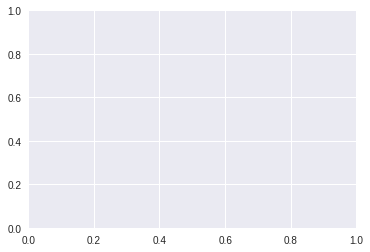

In [21]:
plt.figure(figsize=(20,4))
#plt.suptitle('Liguistic Knowledge Sources Comparison', fontsize=20, x=0.51, y=1.08)

for i, (title, name) in enumerate(zip(titles, names)):
    plt.subplot(1, 3, i+1)
    for res in [ws_summary]:
        x = res['iter']
        y = res[name + '_mean'] * 100
        y_err = res[name + '_std'] * 100
        plt.plot(x, y, linewidth=3)
        plt.fill_between(x, y - y_err, y + y_err, facecolor='red')

    plt.title(title, fontsize=16)
    #plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
    plt.ylim((30, 55))
    plt.xlim((0, 6000))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i == 0:
        plt.ylabel('VQA score', fontsize=14)
    plt.xlabel('Iteration', fontsize=14)

plt.figlegend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.43, 0))
plt.subplots_adjust(bottom=0.3)
#plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )

#plt.tight_layout()
plt.savefig('plots/data_comparison_with_std.png',bbox_inches='tight')
plt.show()

In [22]:
name = 'testonly_score'
for res in [bf_ws, bf, ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
plt.title('Zero-shot Test [Object + Attribute]', fontsize=14)
plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

NameError: name 'bf_ws' is not defined

In [23]:
name = 'test_obj_only_score'
for res in [bf_ws, bf, ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
plt.title('Zero-shot Test [Object]', fontsize=14)
plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

NameError: name 'bf_ws' is not defined

In [24]:
name = 'test_attr_only_score'
for res in [bf_ws, bf, ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
plt.title('Zero-shot Test [Attribute]', fontsize=14)
plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

NameError: name 'bf_ws' is not defined

In [25]:
iterations = wordset_only['iter']
ws = wordset_only['testonly_score']
bf = bf_only['testonly_score']
bf_ws = bf_or_wordset['testonly_score']
noc_bf = noc_bf_or_wordset['test']

NameError: name 'wordset_only' is not defined

In [26]:
help(plt.xaxis)

AttributeError: 'module' object has no attribute 'xaxis'

In [104]:
import os

In [109]:
target_dir = 'experiments/important/0429_vlmap_bf_or_wordset_different_seed/'
dir1 = 'vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_sp_bs512_lr0.001_20180423-205117'
dir2 = 'vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_sp_original10_bs512_lr0.001_20180429-041504'
dir3 = 'vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_sp_original11_bs512_lr0.001_20180429-044746'

In [110]:
path1 = os.path.join(target_dir, dir1, 'collect_eval_test_result.pkl')
path2 = os.path.join(target_dir, dir2, 'collect_eval_test_result.pkl')
path3 = os.path.join(target_dir, dir3, 'collect_eval_test_result.pkl')
paths = [path1, path2, path3]

In [111]:
pkls = []
for path in paths:
    pkls.append(cPickle.load(open(path)))

In [114]:
pkls[0].keys()

['test_obj_only_score',
 'test_attr_only_score',
 'testonly_score_num_point',
 'test_attr_only_score_num_point',
 'iter',
 'test_obj_only_score_num_point',
 'testonly_score']

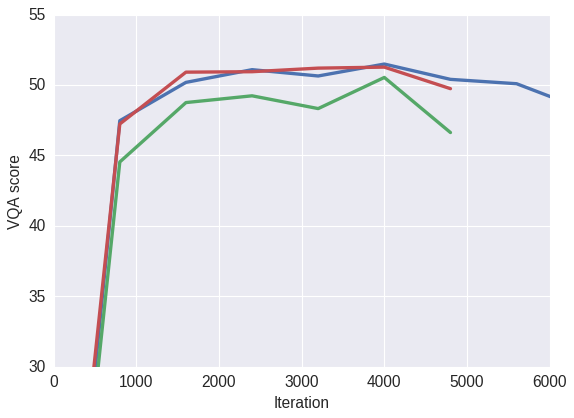

In [115]:
name = 'testonly_score'
for pkl in pkls:
    plt.plot(pkl['iter'], np.array(pkl[name]) * 100, linewidth=3)
#plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
#plt.title('Zero-shot test VQA score', fontsize=14)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

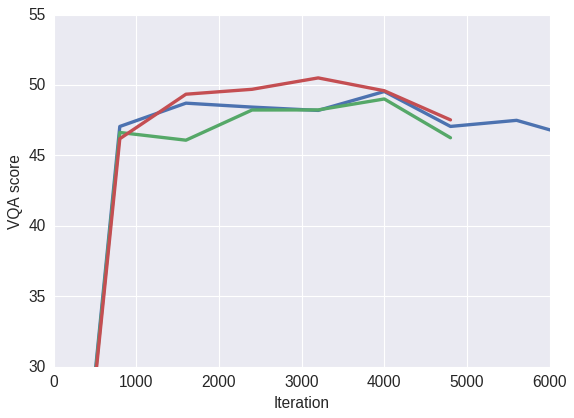

In [116]:
name = 'test_obj_only_score'
for pkl in pkls:
    plt.plot(pkl['iter'], np.array(pkl[name]) * 100, linewidth=3)
#plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
#plt.title('Zero-shot test VQA score', fontsize=14)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

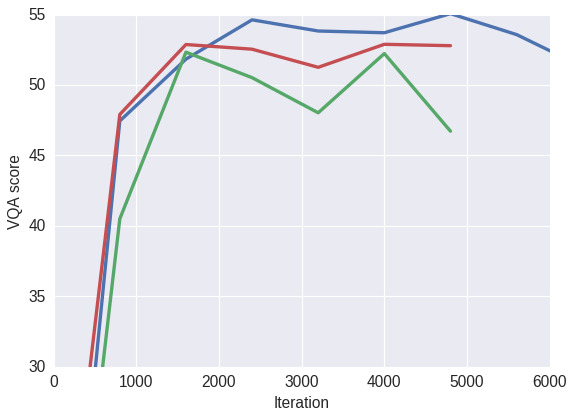

In [117]:
name = 'test_attr_only_score'
for pkl in pkls:
    plt.plot(pkl['iter'], np.array(pkl[name]) * 100, linewidth=3)
#plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
#plt.title('Zero-shot test VQA score', fontsize=14)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

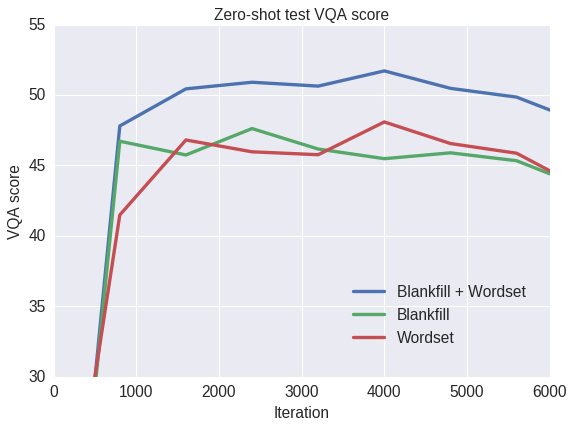

In [102]:
plt.plot(iterations, np.array(bf_ws) * 100, linewidth=3)
plt.plot(iterations, np.array(bf) * 100, linewidth=3)
plt.plot(iterations, np.array(ws) * 100, linewidth=3)
#plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
plt.title('Zero-shot test VQA score', fontsize=14)
plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

In [6]:
wordset_only

{'iter': [1, 801, 1601, 2401, 3201, 4001, 4801, 5601, 6401, 7201],
 'testonly_score': [0.1091049,
  0.41483992,
  0.46810886,
  0.45969138,
  0.4576435,
  0.48089606,
  0.46557546,
  0.45868668,
  0.4337996,
  0.42015192],
 'testonly_score_num_point': [20802,
  20802,
  20802,
  20802,
  20802,
  20802,
  20802,
  20802,
  20802,
  20802]}

In [ ]:
iterations = [1,801,1601,2401,3201,4001,4801,5601,6401,7201]